In [2]:
#    Check for adequate sample sizes.
#    Check for changes over time in results.
#    Formally test for a significant difference in conversions between treatment and control groups.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv("C:/Users/chowd/OneDrive/Desktop/DS_-_ab_edited.csv")

In [9]:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
 5   date          290585 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.3+ MB


In [45]:
df['date']= pd.DatetimeIndex(df['timestamp']).date
print(df['date'])


0         2017-01-21
1         2017-01-12
2         2017-01-11
3         2017-01-08
4         2017-01-21
             ...    
290580    2017-01-03
290581    2017-01-12
290582    2017-01-22
290583    2017-01-15
290584    2017-01-16
Name: date, Length: 290585, dtype: object


In [88]:
# Checking for adequate sample size
print('treatment sample size:', len(df[df['group']=='treatment']))
print('control sample size:', len(df[df['group']=='control']))
print('treatment proportion:', df['group'].value_counts()['treatment']/ len(df))

treatment sample size: 145311
control sample size: 145274
treatment proportion: 0.5000636646764286


In [53]:
# what is the sign up rate of treatment and control?
print('treatment signup rate:', df[df['group']=='treatment'].converted.mean())
print('control signup rate: ', df[df['group']=='control'].converted.mean())

treatment signup rate: 0.11880724790277405
control signup rate:  0.1203863045004612


In [54]:
# Are the treatment and control groups significantly different?
stats.ttest_ind(df[df['group']=='treatment'].converted,df[df['group']=='control'].converted)

Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

In [55]:
# The test statistic is less than 1.96 and pvalue<0.05 hence null is accepted that the groups are not statistically different

In [56]:
# The treatment group signup rate is lower than the signup rate of the control group.Let's look at some secondary metrics.


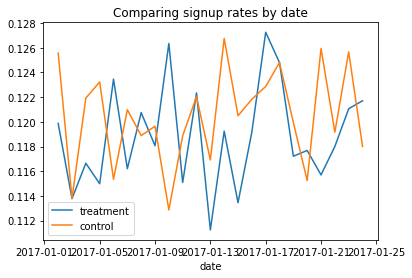

In [67]:
fig = df[df['group']=='treatment'][['date','converted']].groupby('date').mean().plot()
df[df['group']=='control'][['date','converted']].groupby('date').mean().plot(ax=fig)
plt.legend(['treatment','control'])
plt.title('Comparing signup rates by date')
plt.show()

In [68]:
# Generating a test statistic comparing treatment and control on date
print('t-test results by date')
for dates in df.date.unique():
    dated_data= df[df.date==dates]
    print(stats.ttest_ind(dated_data[dated_data['group']=='treatment'].converted,
                         dated_data[dated_data['group']=='control'].converted))

t-test results by date
Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult

In [69]:
# Hence we can conclude that there is no significant difference in  conversion rates between treatment and control groups. 

In [70]:
df

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21
...,...,...,...,...,...,...
290580,751197,2017-01-03 22:28:38.630509,control,old_page,0,2017-01-03
290581,945152,2017-01-12 00:51:57.078372,control,old_page,0,2017-01-12
290582,734608,2017-01-22 11:45:03.439544,control,old_page,0,2017-01-22
290583,697314,2017-01-15 01:20:28.957438,control,old_page,0,2017-01-15
